In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
left = df[df.left==1]
left.shape

(3571, 10)

In [34]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [35]:
#Average Number all cols
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [36]:
#From above table we can draw following conclusions,

#Satisfaction Level: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
#Average Monthly Hours: Average monthly hours are higher in employees leaving the firm (199 vs 207)
#Promotion Last 5 Years: Employees who are given promotion are likely to be retained at firm

<AxesSubplot: xlabel='salary'>

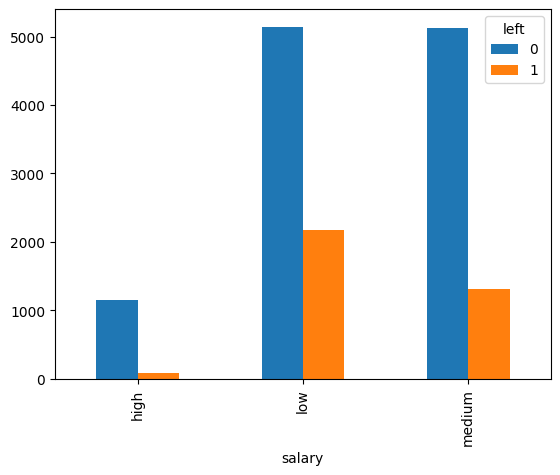

In [39]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
#it seems that employees with lower salaries tend to leave more

<AxesSubplot: xlabel='Department'>

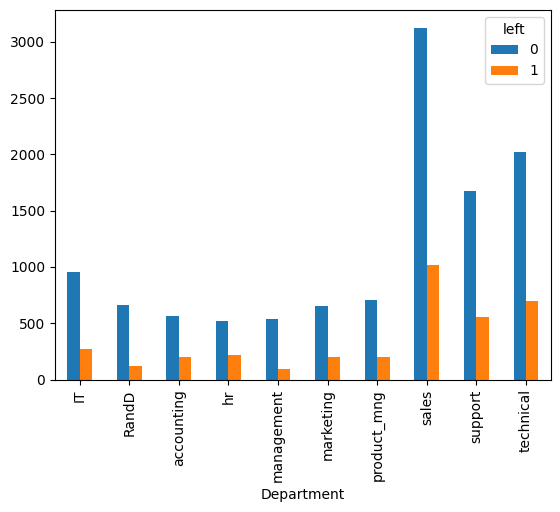

In [42]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
#The impact of department on employees is not major, so we will ignore it

<AxesSubplot: xlabel='number_project'>

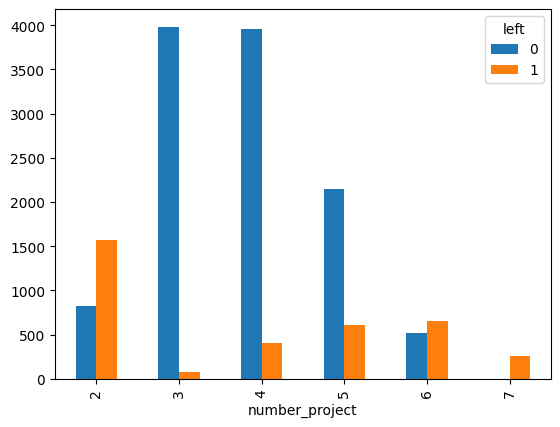

In [47]:
pd.crosstab(df.number_project, df.left).plot(kind='bar')


In [48]:
#From the data analysis so far we can conclude that we will use following variables as independant variables in our model:
    #Satisfaction Level
    #Average Monthly Hours
    #Promotion Last 5 Years
    #Salary

In [89]:
filtered_df = df[['satisfaction_level', 'average_montly_hours','promotion_last_5years', 'salary']]
filtered_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [90]:
dummies = pd.get_dummies(filtered_df['salary'])
filtered_df.drop('salary', axis='columns', inplace=True)
filtered_df = pd.concat([filtered_df, dummies], axis="columns")
filtered_df

C:\Users\max\AppData\Local\Temp\ipykernel_17376\1344477832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('salary', axis='columns', inplace=True)


,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filtered_df, df.left, train_size=0.3)

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

c:\Users\max\anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7828888888888889